## Tess Centroid Vetting usage
```python
   def centroid_vetting(tpf, epochs, transit_dur, 
                      intransit_margin = 0, ootransit_inner = 0, ootransit_outer = 0,
                      plot = True, plot_flux_centroid = False, mask_edges = False): 
   '''
   Minimum Parameters:
       tpf                  [Tess TargetPixelFile]
       epochs               [list] or [float] of transit time(s) to analyse
       transit_dur          [float] Transit duration in days

   Optional parameters: 
       intransit_margin     Margin in days around transit time(s) 
                            [float]  default = transit_dur * 0.4
       ootransit_inner      Margin in days of out of transit (inner limit)
                            [float]  default = transit_dur * 0.75
       ootransit_outer      Margin in days of out of transit (outer limit)
                            [float]  default = oot_inner_margin + transit_dur
       plot                 Display images 
                            [boolean] default = True 
       plot_flux_centroid   Also plots a small cross for the Flux Centroid)                                     
                            [boolean] default = False  
       mask_edges           Mask pixels at edge if brighter than brightest pixel in central region
                            [boolean] default = False (Only can be set if difference image brightest pixel is at edge)
            
       In transit times     : epoch(s) ± intransit_margin
       Out of transit times : Between <epoch(s) ± ootransit_outer>  and  <epoch(s) ± ootransit_inner> 
   '''
```
> **Note**: In 99% of the cases the minimum parameters above are enough, as the default margin values, calculated from transit duration, are suitable. If you need to tweak those values, you can use function below, **show_transit_margins()**, with **interact=True**. (See below)
```python
    def show_transit_margins(tpf, epoch, transit_dur, intransit_margin = 0, ootransit_inner = 0, ootransit_outer = 0,
                            interact = False):
        # Parameters as in centroid_vetting(), but use single epoch (List or float)
        # Option "interact = True" let you tweak the margins with sliders (using ipywidgets)
```        

In [1]:
import lightkurve as lk
#
from tesscentroidvetting import centroid_vetting, show_transit_margins
#

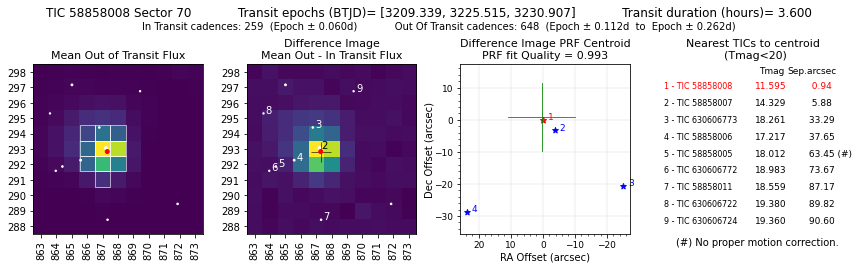

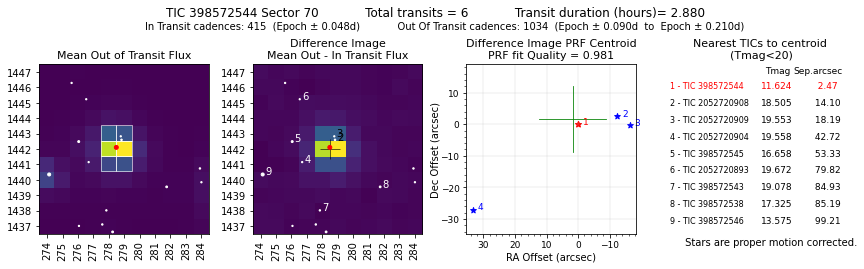

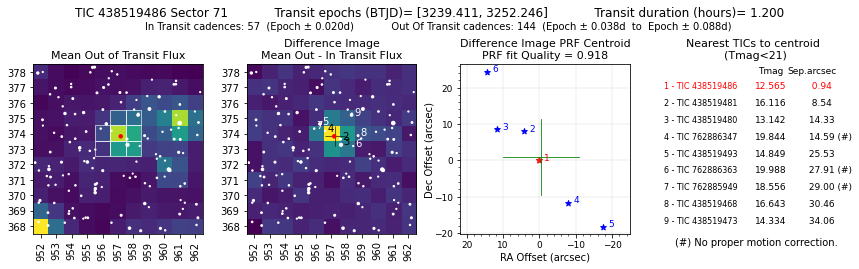

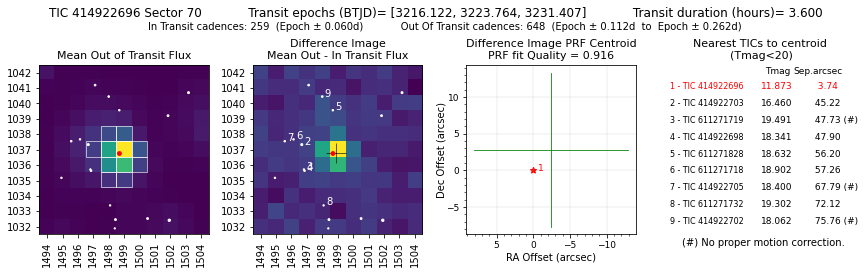

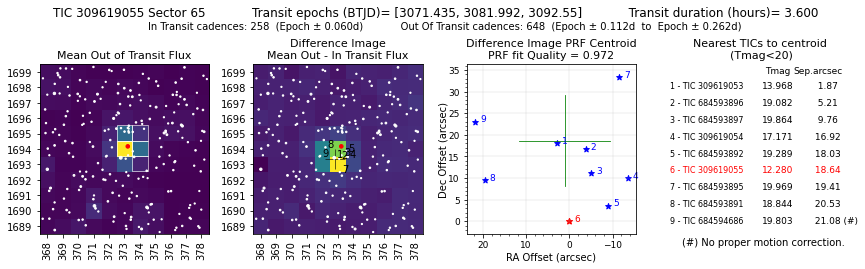

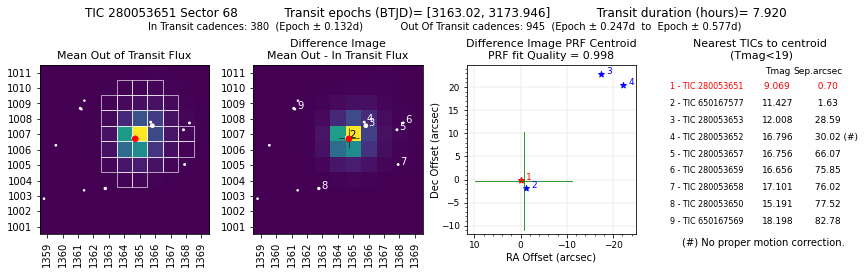

In [2]:
for r in range(6):
    if r==0:
        # TOI 6842.01 Planet candidate https://www.zooniverse.org/projects/nora-dot-eisner/planet-hunters-tess/talk/2112/3183841
        TIC_ID = 58858008
        sector = 70    
        ttimes = [3209.3388, 3225.5151, 3230.9072]
        tot_dur = 0.15
    if r == 1:
        # WASP28-B  Confirmed Planet https://www.zooniverse.org/projects/nora-dot-eisner/planet-hunters-tess/talk/2112/3184216
        TIC_ID = 398572544   #wasp28-B 
        sector = 70
        ttimes = [3209.352289,3212.761298,3216.170306,3222.988322,3226.397330,3229.806344]
        tot_dur = 0.12
    if r == 2:
        # TOI 5403.01 Planet candidate https://www.zooniverse.org/projects/nora-dot-eisner/planet-hunters-tess/talk/2112/3203688
        TIC_ID = 438519486
        sector = 71
        ttimes = [3239.411204, 3252.246261]
        tot_dur = 0.05
    if r == 3:
        #   https://www.zooniverse.org/projects/nora-dot-eisner/planet-hunters-tess/talk/2112/3190029?comment=5243900&page=1
        TIC_ID = 414922696
        sector = 70
        ttimes = [3216.121833, 3223.764306, 3231.406779]
        tot_dur = 0.15
    if r == 4:
        # NEB  https://www.zooniverse.org/projects/nora-dot-eisner/planet-hunters-tess/talk/2112/3080388
        TIC_ID = 309619055
        sector = 65
        ttimes = [3071.435318, 3081.99241, 3092.549500]
        tot_dur = 0.15    
    if r == 5:
        # EB or NEB https://www.zooniverse.org/projects/nora-dot-eisner/planet-hunters-tess/talk/2112/3111229
        TIC_ID = 280053651
        sector = 68
        ttimes= [3163.019622, 3173.946100]
        tot_dur = 0.33

    TICstr = 'TIC '+str(TIC_ID)
  
    sres = lk.search_targetpixelfile(TICstr, sector=sector, mission='TESS', author='SPOC',exptime=120)
    tpf = sres[0].download()
    #
    results = centroid_vetting(tpf, ttimes, tot_dur)
    #

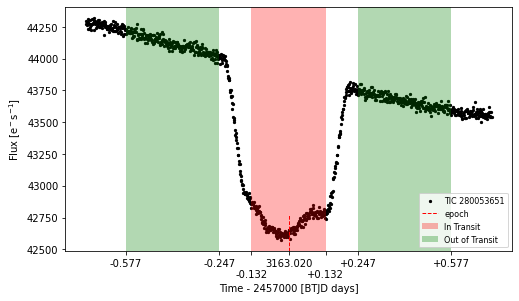

In [3]:
# 
show_transit_margins(tpf, ttimes[0], tot_dur, interact=False)

In [ ]:
# Interactive mode
a, b, c = show_transit_margins(tpf, ttimes[0], tot_dur, interact=True)

In [ ]:
print(a.value, b.value, c.value)
results = centroid_vetting(tpf, ttimes, tot_dur, 
                           intransit_margin=a.value, ootransit_inner=b.value, ootransit_outer=c.value)